Simple 2D pose estimation from line segments

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

In [3]:
ROOT_DIR = '..'
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

import faai

In [4]:
segments = np.array([
    [(2.5, 1.), (0.7, 5.3)],
    [(4.6, 2.1), (2.7, 3.3)],
    [(5., 5.1), (6.2, 6.5)],
    [(4., 4.), (7., 4.2)],
    [(2., 5.), (2., 7.)],
])

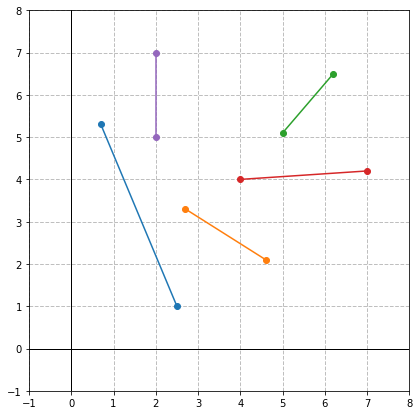

In [5]:
plt.figure(figsize=(7, 7))
faai.canvas(xlim=(-1, 8), ylim=(-1, 8))

for segment in segments:
    
    plt.plot(segment[:, 0], segment[:, 1], 'o-')
    

In [6]:
print('Lengths of segments:')
for segment in segments:
    
    p1, p2 = segment
    
    vec_len = np.linalg.norm(p2 - p1)
    print(p1, p2, '\t{:.3f}'.format(vec_len))

Lengths of segments:
[2.5 1. ] [0.7 5.3] 	4.662
[4.6 2.1] [2.7 3.3] 	2.247
[5.  5.1] [6.2 6.5] 	1.844
[4. 4.] [7.  4.2] 	3.007
[2. 5.] [2. 7.] 	2.000


Vectors difference, then scaling, then find normal

In [7]:
def segment_to_pose(p1, p2):
    
    p1 = np.array(p1)
    p2 = np.array(p2)
    
    v_diff = p2 - p1
    
    i = v_diff / np.linalg.norm(v_diff)
    
    rotate = faai.rotation_matrix_2d(np.pi / 2)
    j = np.dot(rotate, i)
    
    T = np.zeros((3, 3))
    T[:2, 0] = i
    T[:2, 1] = j
    T[:2, 2] = p1
    T[-1, -1] = 1
    
    return T

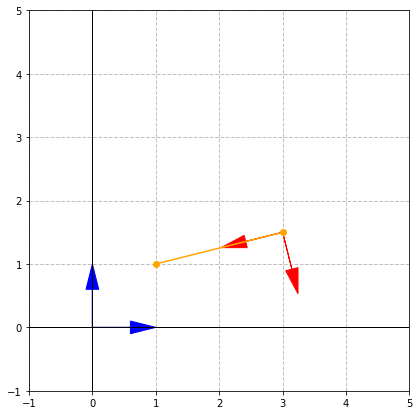

In [8]:
plt.figure(figsize=(7, 7))
faai.canvas(xlim=(-1, 5), ylim=(-1, 5))

# Base frame (blue)
faai.plot_frame(np.eye(3), c='b')

example_segment = np.array([
    [1, 1], 
    [3, 1.5]
])

plt.plot(example_segment[:, 0], example_segment[:, 1], 'o-', color='orange')

T1 = segment_to_pose(example_segment[1], example_segment[0])
faai.plot_frame(T1, c='r')

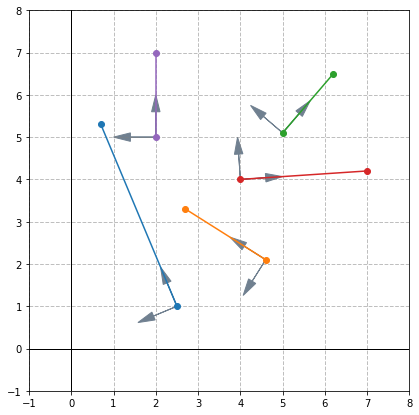

In [9]:
plt.figure(figsize=(7, 7))
faai.canvas(xlim=(-1, 8), ylim=(-1, 8))

for segment in segments:
    
    plt.plot(segment[:, 0], segment[:, 1], 'o-')
    
    T_seg = segment_to_pose(segment[0], segment[1])
    faai.plot_frame(T_seg, c='slategray')

## Line vectors

(optional)

In [10]:
def line_vector_from_two_points(p1, p2):

    x1, y1 = p1
    x2, y2 = p2
    
    line_vec = np.cross([x1, y1, 1], [x2, y2, 1])

    return faai.hnormalize(line_vec)

In [11]:
for segment in segments:
    
    p1 = segment[0]
    p2 = segment[1]
    
    print(p1, p2, line_vector_from_two_points(p1, p2))

[2.5 1. ] [0.7 5.3] [-0.34262948 -0.14342629  1.        ]
[4.6 2.1] [2.7 3.3] [-0.12618297 -0.1997897   1.        ]
[5.  5.1] [6.2 6.5] [-1.59090909  1.36363636  1.        ]
[4. 4.] [7.  4.2] [ 0.01785714 -0.26785714  1.        ]
[2. 5.] [2. 7.] [-0.5  0.   1. ]
